1.FeatureExploration

In [1]:
#Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import datetime
import seaborn as sns
from datetime import date

In [2]:
#Importing the dataset
#data1 csv
data1 = pd.read_csv("/content/train_users_2.csv")
#data2 csv
data2 = pd.read_csv("/content/test_users.csv")

In [3]:
print('the columns name of data1 dataset:\n',data1.columns)
print('the columns name of data2 dataset:\n',data2.columns)

the columns name of data1 dataset:
 Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')
the columns name of data2 dataset:
 Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')


In [4]:
data1.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
data2.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [6]:
#Checking null values
data1.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [7]:
# sessions csv
session = pd.read_csv("/content/sessions.csv")
session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [8]:
#Checking null values
session.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [9]:
session = session.dropna(subset = ['user_id'])
session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [10]:
session_concat = session.groupby('user_id', as_index=False).agg(lambda x: x.tolist())
session_concat.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,00023iyk9l,"[index, dashboard, header_userpic, dashboard, ...","[view, view, data, view, partner_callback, mes...","[view_search_results, dashboard, header_userpi...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[20438.0, 787.0, 850.0, 934.0, nan, 129817.0, ..."
1,0010k6l0om,"[search_results, show, personalize, show, sear...","[click, view, data, nan, click, click, nan, da...","[view_search_results, p3, wishlist_content_upd...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[1708.0, 21260.0, 1223.0, 26.0, 847.0, 1230.0,..."
2,001wyh0pz8,"[search, search, search, show, social_connecti...","[click, click, click, view, data, -unknown-, v...","[view_search_results, view_search_results, vie...","[Android App Unknown Phone/Tablet, Android App...","[622.0, 1813.0, 1507.0, 6327.0, 927.0, 142.0, ..."
3,0028jgx1x1,"[show, reviews, show, search, show, search, re...","[view, data, view, click, view, click, data, s...","[user_profile, listing_reviews, p3, view_searc...","[-unknown-, -unknown-, -unknown-, -unknown-, -...","[6162.0, 75.0, 86.0, 13710.0, 25217.0, 10989.0..."
4,002qnbzfs5,"[social_connections, payment_methods, create, ...","[data, -unknown-, -unknown-, view, data, data,...","[user_social_connections, -unknown-, -unknown-...","[iPhone, iPhone, iPhone, iPhone, iPhone, iPhon...","[17135.0, 711.0, 274.0, 179.0, 483.0, 1.0, 782..."


In [11]:
# Join data1 and session df
data1_merge = data1.merge(session_concat, left_on='id', right_on='user_id', how='inner')
print("data1  :",data1.shape)
print("Session:",session_concat.shape)
print("Merge  :",data1_merge.shape)
print("No of users in data1 Data with session info:",data1_merge.shape[0])
print("{} / {} = {}".format(data1_merge.shape[0],data1.shape[0],np.round((data1_merge.shape[0]/data1.shape[0]),2)))

data1  : (213451, 16)
Session: (135483, 6)
Merge  : (73815, 22)
No of users in data1 Data with session info: 73815
73815 / 213451 = 0.35


only 35 % of users in data1 data have session info

In [12]:
# Join data2 and session df
data2_merge = data2.merge(session_concat, left_on='id', right_on='user_id', how='inner')
print("data2  :",data2.shape)
print("Session:",session_concat.shape)
print("Merge  :",data2_merge.shape)
print("No of users in data2 Data with session info:",data2_merge.shape[0])
print("{} / {} = {}".format(data2_merge.shape[0],data2.shape[0],np.round((data2_merge.shape[0]/data2.shape[0]),2)))

data2  : (62096, 15)
Session: (135483, 6)
Merge  : (61668, 21)
No of users in data2 Data with session info: 61668
61668 / 62096 = 0.99


99% of the users in data2 data have sessions info

In [13]:
#Using left join
data2_merge = data2.merge(session_concat, left_on='id', right_on='user_id', how='left')
print("data2  :",data2.shape)
print("Session:",session_concat.shape)
print("Merge  :",data2_merge.shape)
print("No of users in data2 Data with session info:",data2_merge.shape[0])
print("{} / {} = {}".format(data2_merge.shape[0],data2.shape[0],np.round((data2_merge.shape[0]/data2.shape[0]),2)))

data2  : (62096, 15)
Session: (135483, 6)
Merge  : (62096, 21)
No of users in data2 Data with session info: 62096
62096 / 62096 = 1.0


Exploratory data analysis

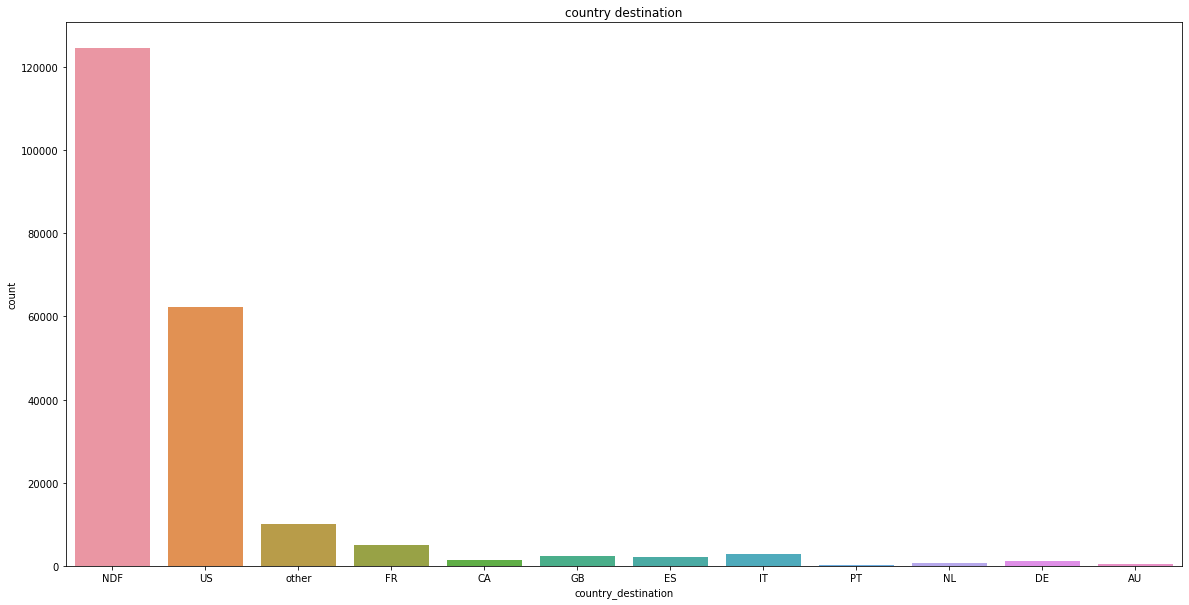

In [14]:
#Plot of the target variable
plt.figure(figsize=(20,10))
ax = sns.countplot(x="country_destination", data=data1)
plt.title("country destination")
plt.show()

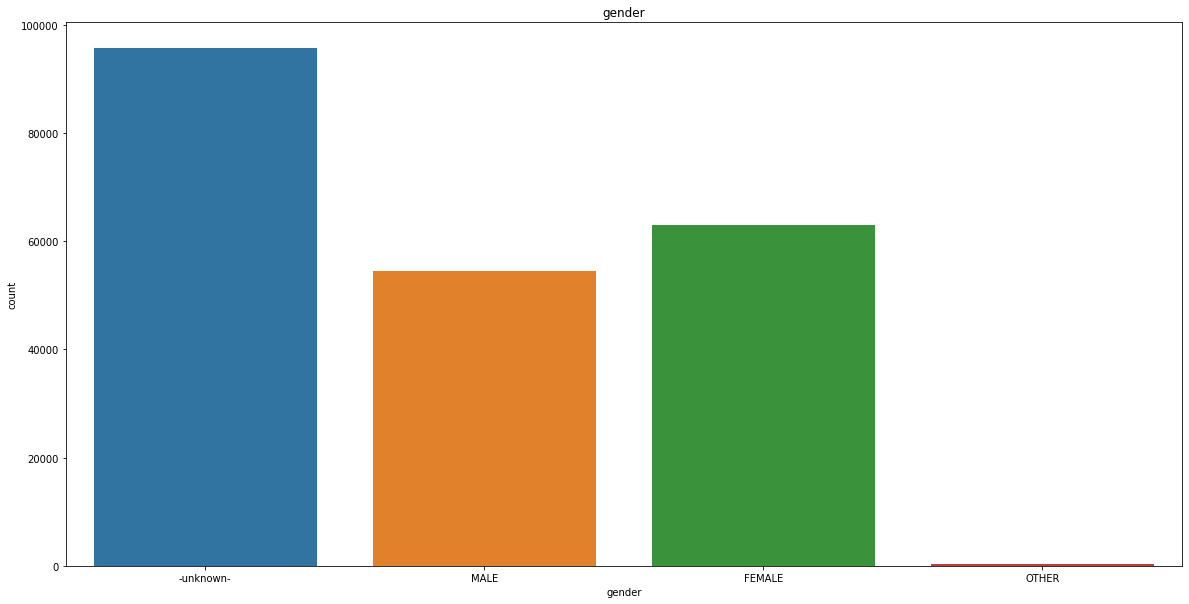

In [15]:
# distrbution of gender
plt.figure(figsize=(20,10))
ax = sns.countplot(x="gender", data=data1)
plt.title("gender")
plt.show()

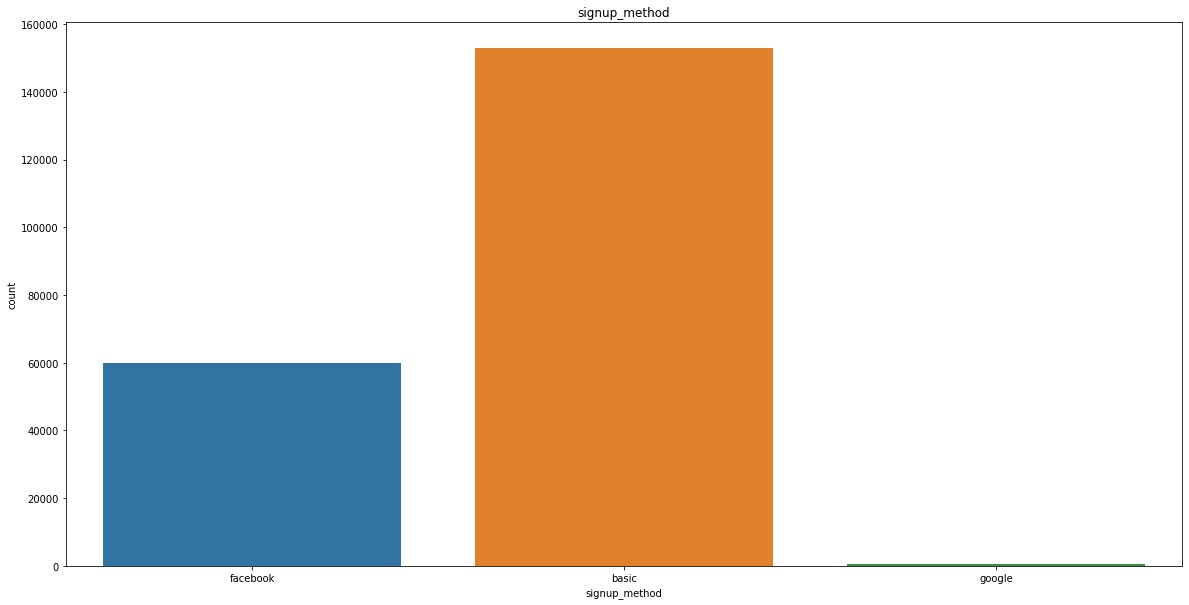

In [16]:
# distribution of signup_method
plt.figure(figsize=(20,10))
ax = sns.countplot(x="signup_method", data=data1)
plt.title("signup_method")
plt.show()

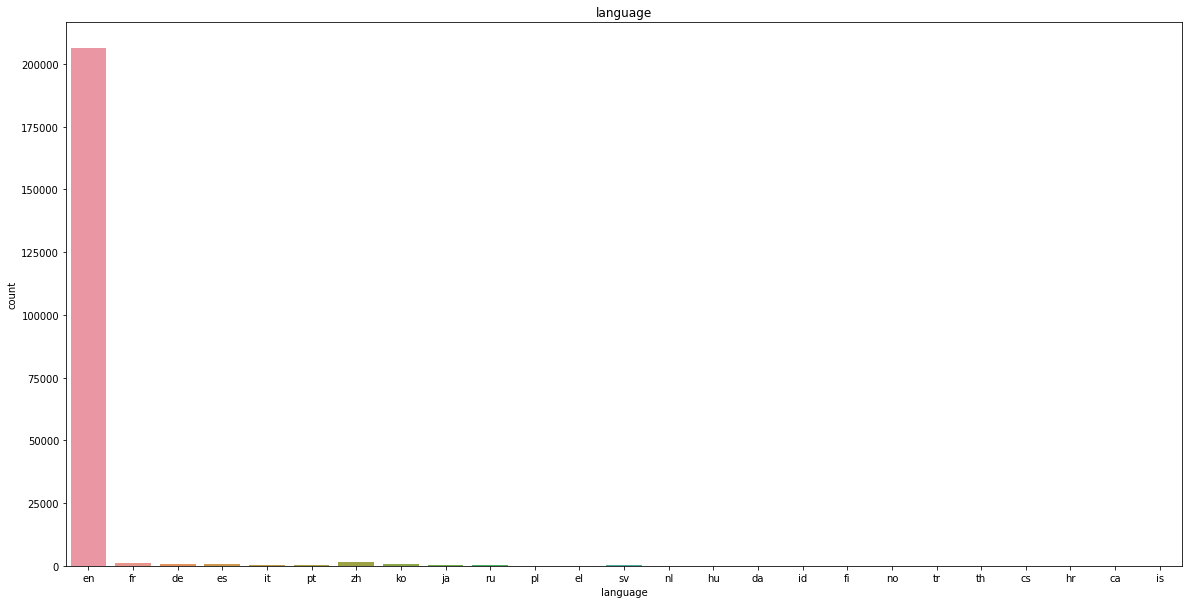

In [17]:
# distribution of language
plt.figure(figsize=(20,10))
ax = sns.countplot(x="language", data=data1)
plt.title("language")
plt.show()

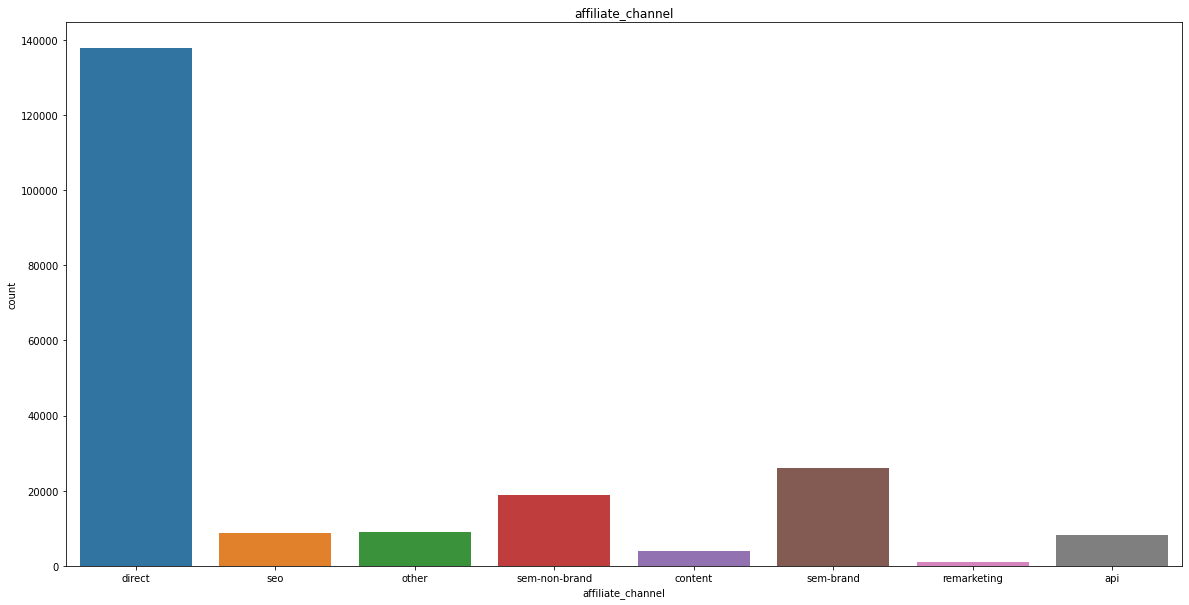

In [18]:
# distribution of affiliate_channel
plt.figure(figsize=(20,10))
x = sns.countplot(x="affiliate_channel", data=data1)
plt.title("affiliate_channel")
plt.show()

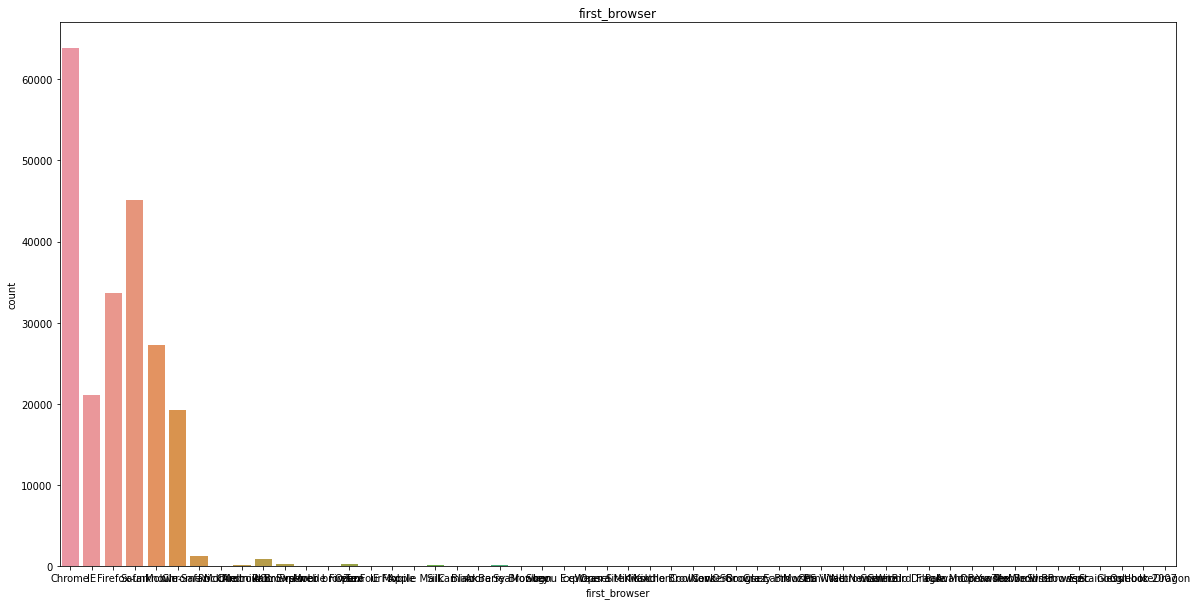

In [19]:
# distrubution of first_browser
plt.figure(figsize=(20,10))
ax = sns.countplot(x="first_browser", data=data1)
plt.title("first_browser")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


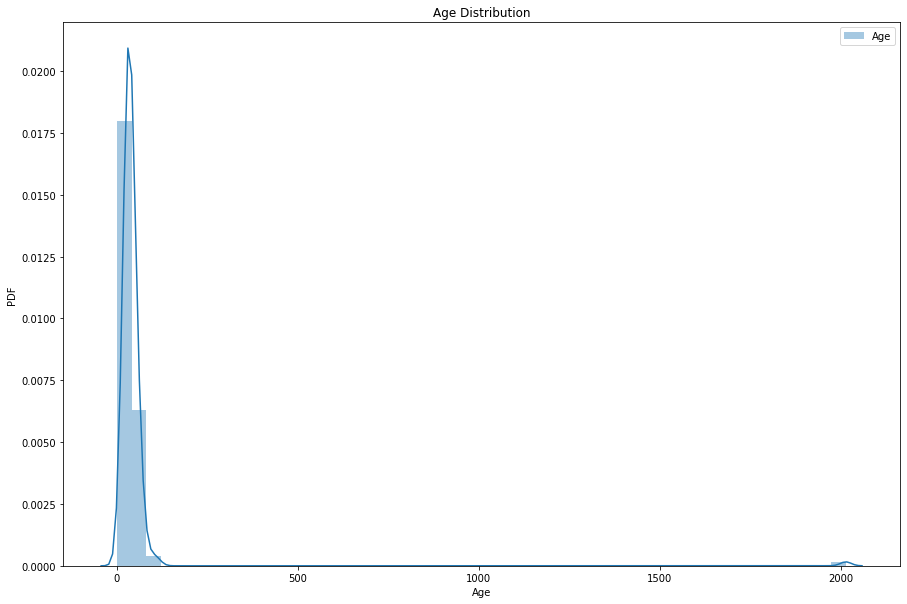

In [20]:
# Age distribution
plt.figure(figsize=(15,10))
ax = sns.distplot(data1['age'].dropna(),label="Age")
ax.set_title('Age Distribution')
ax.set(xlabel='Age', ylabel='PDF')
plt.legend()
plt.show()

There are multiple outliers in the age predictor

In [21]:
np.nanmedian(data1['age'])

34.0

In [22]:
#Function to replace age outlier with median value
def medianAge(age):
    if age<15.0 or age>100.0:
        return 34.0
    else:
        return age

data1['age'] = data1['age'].apply(medianAge)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


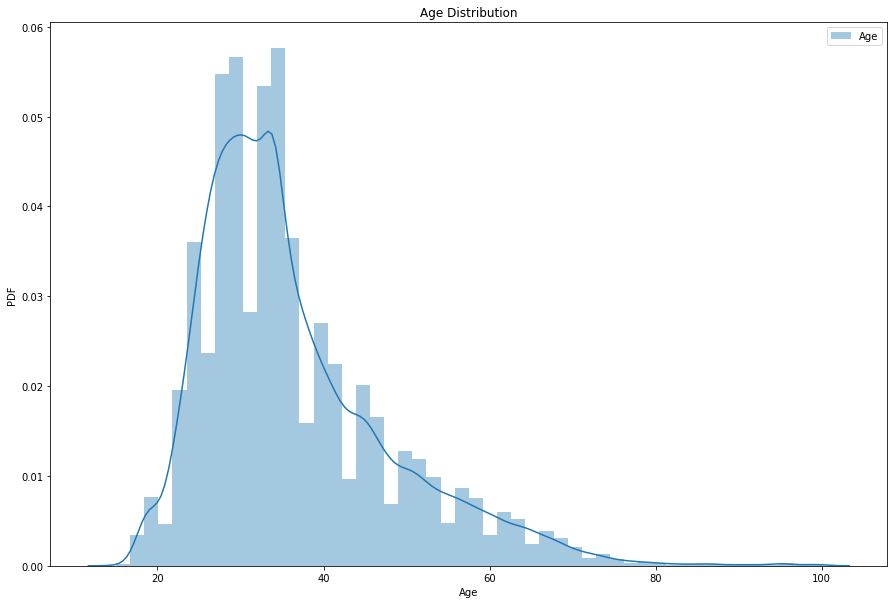

In [23]:
# Age distribution
plt.figure(figsize=(15,10))
ax = sns.distplot(data1['age'].dropna(),label="Age")
ax.set_title('Age Distribution')
ax.set(xlabel='Age', ylabel='PDF')
plt.legend()
plt.show()

In [24]:
# daily,monthly and yearly data
data1['date_account_created'] = pd.to_datetime(data1['date_account_created'])
data1['date_account_created_day'] = data1.date_account_created.dt.weekday
data1['date_account_created_month'] = data1.date_account_created.dt.month
data1['date_account_created_year'] = data1.date_account_created.dt.year

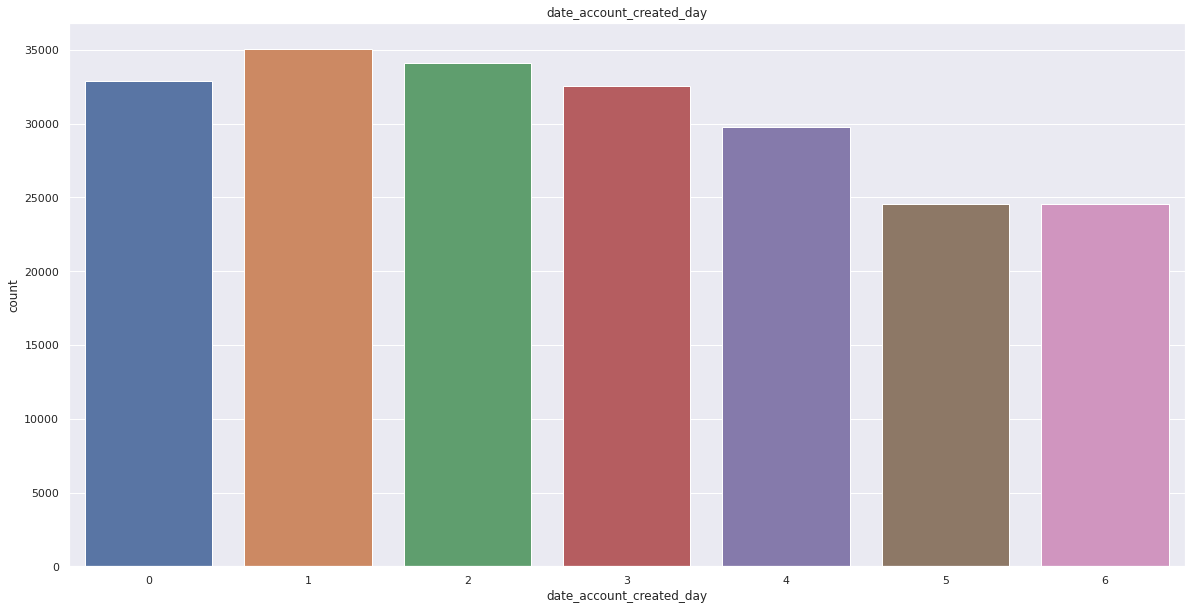

In [25]:
# date_account_created_day share
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="date_account_created_day", data=data1)
plt.title("date_account_created_day")
plt.show()

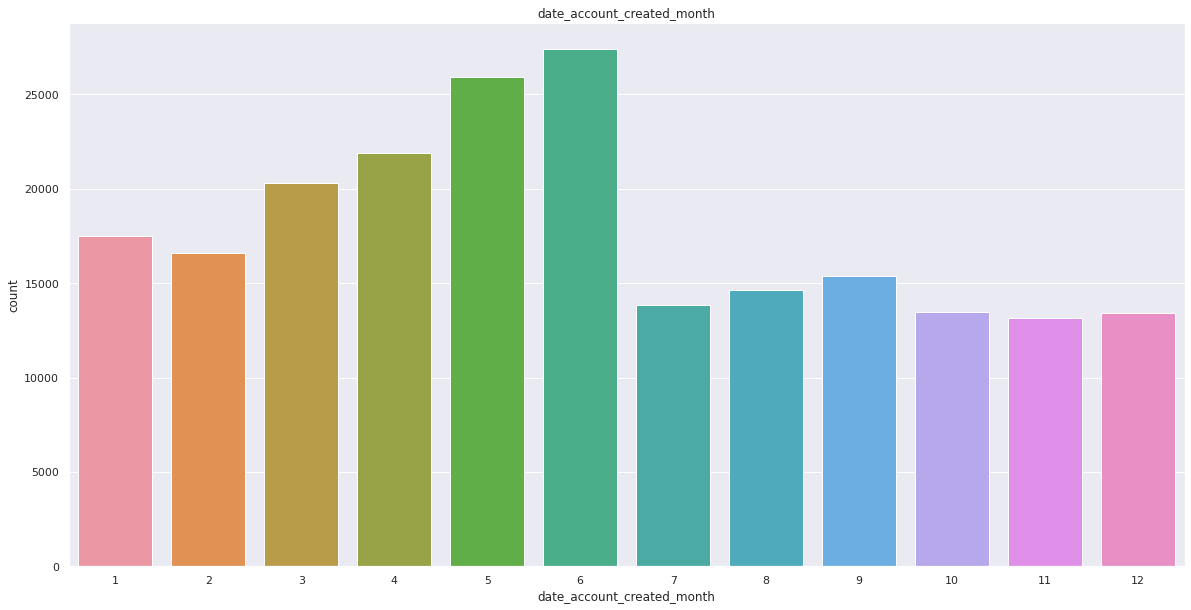

In [26]:
# date_account_created_day share
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="date_account_created_month", data=data1)
plt.title("date_account_created_month")
plt.show()

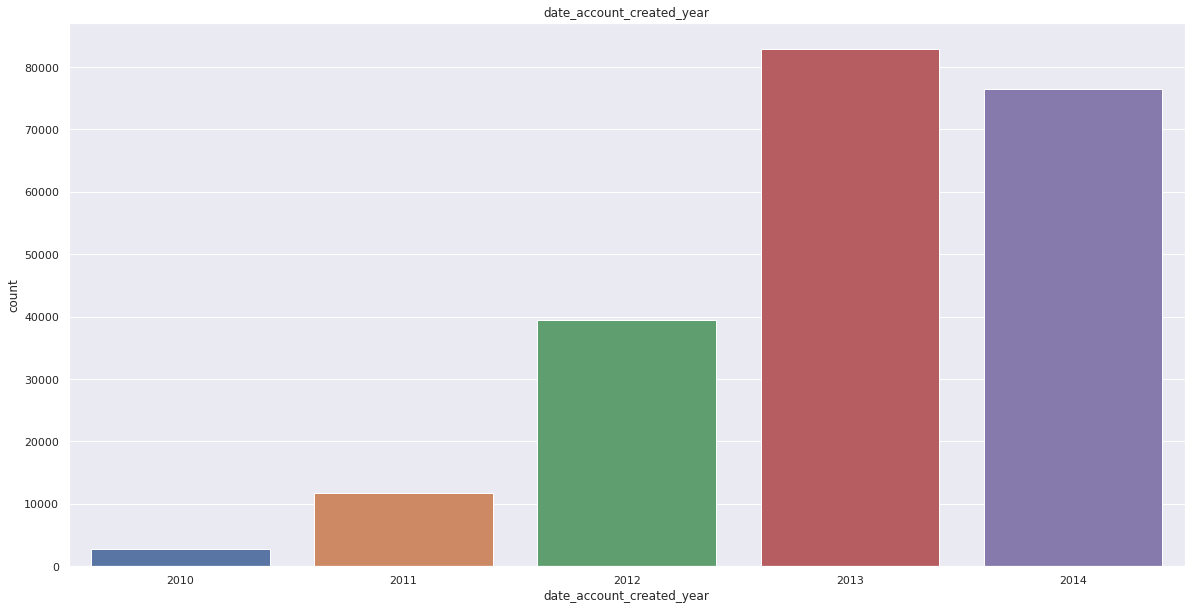

In [27]:
# date_account_created_day share
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="date_account_created_year", data=data1)
plt.title("date_account_created_year")
plt.show()

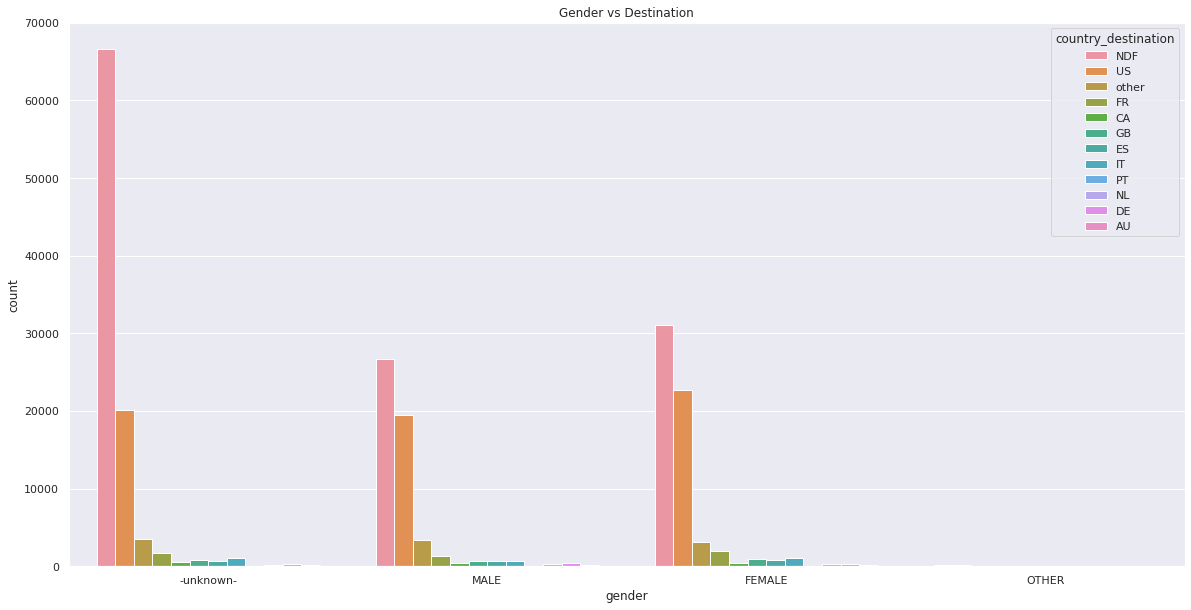

In [28]:

# gender share
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="gender", hue="country_destination", data=data1)
plt.title("Gender vs Destination")
plt.show()

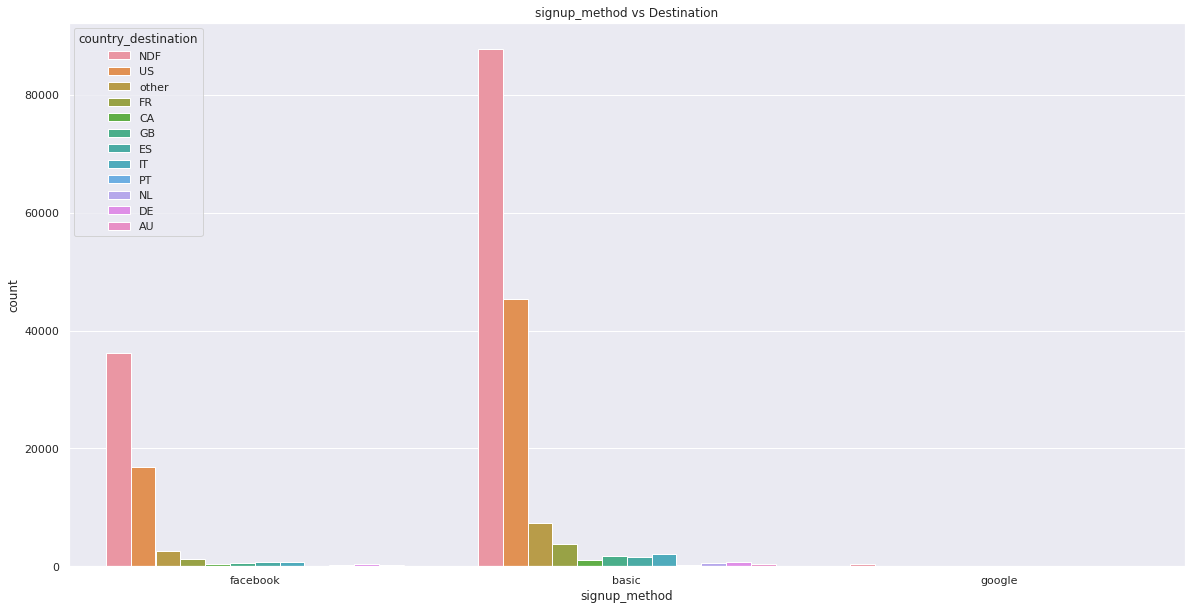

In [29]:
# signup_method share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="signup_method", hue="country_destination", data=data1)

plt.title("signup_method vs Destination")

plt.show()

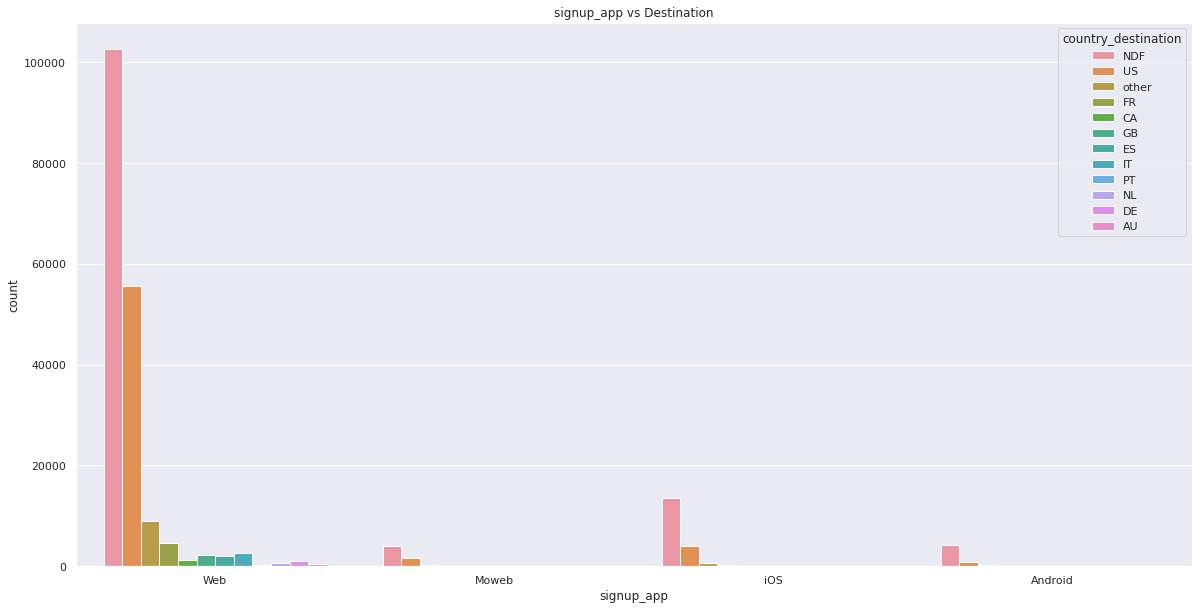

In [30]:

# signup_app share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="signup_app", hue="country_destination", data=data1)

plt.title("signup_app vs Destination")

plt.show()

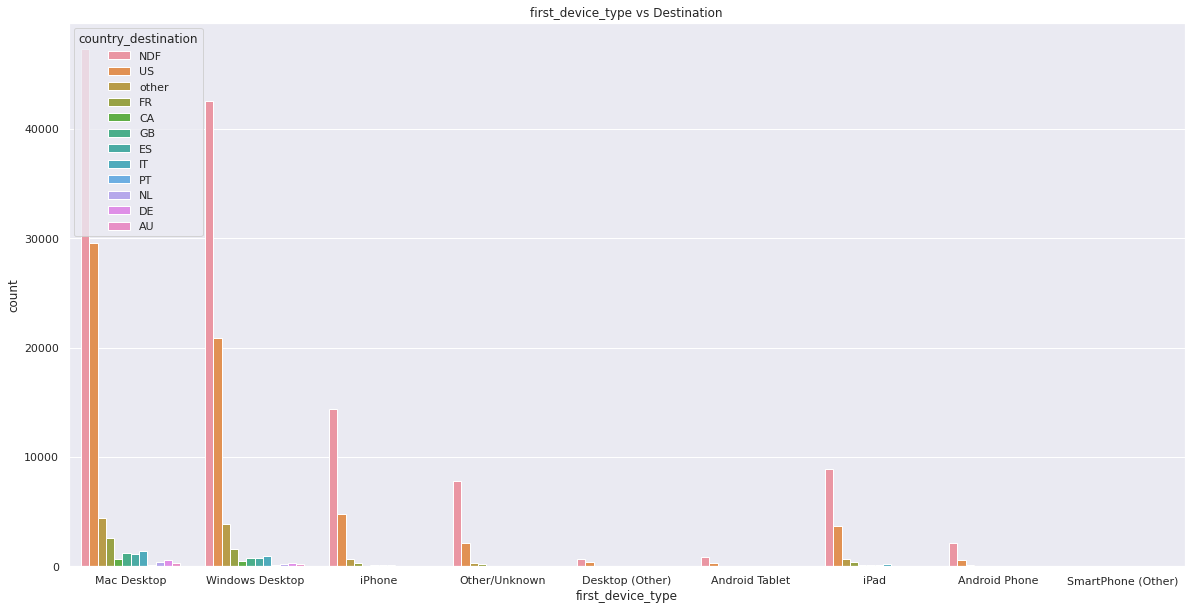

In [31]:
# first_device_type share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="first_device_type", hue="country_destination", data=data1)

plt.title("first_device_type vs Destination")

plt.show()

Feauture Engineering

In [32]:

import pandas as pd
import numpy as np
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re
from wordcloud import WordCloud
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from datetime import datetime, date
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import coo_matrix
from scipy.sparse import hstack
from scipy.sparse import vstack
from scipy import sparse
from scipy.sparse import csr_matrix
from sklearn.preprocessing import OneHotEncoder
import pickle
import joblib

In [33]:

#data1 csv

data1_df = pd.read_csv('/content/train_users_2.csv')

print(data1_df.shape)

print(data1_df.columns)

data1_df.head()

(213451, 16)
Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [34]:
#Checking null values
data1_df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [35]:

# sessions csv

session_df = pd.read_csv('/content/sessions.csv')

print(session_df.shape)

print("\nColumns:",session_df.columns)

session_df.head()

(10567737, 6)

Columns: Index(['user_id', 'action', 'action_type', 'action_detail', 'device_type',
       'secs_elapsed'],
      dtype='object')


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [36]:
#Checking null values
session_df.isnull().sum()



user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [37]:

#data1 = pd.read_csv("/content/data1_users_2.csv")
#data2 = pd.read_csv("/content/data2_users.csv")
#df_sessions = pd.read_csv('/content/sessions.csv')

In [38]:
print(session_df.shape)

session_df = session_df.dropna(subset = ['user_id'])

print(session_df.shape)

(10567737, 6)
(10533241, 6)


In [39]:
session_df['user_id'].nunique()

135483

In [40]:

session_df['device_type'].unique()

array(['Windows Desktop', '-unknown-', 'Mac Desktop', 'Android Phone',
       'iPhone', 'iPad Tablet', 'Android App Unknown Phone/Tablet',
       'Linux Desktop', 'Tablet', 'Chromebook', 'Blackberry', 'iPodtouch',
       'Windows Phone', 'Opera Phone'], dtype=object)

In [41]:


session_df_concat = session_df.groupby('user_id', as_index=False).agg(lambda x: x.tolist())

print(session_df_concat.shape)

session_df_concat.head()

(135483, 6)


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,00023iyk9l,"[index, dashboard, header_userpic, dashboard, ...","[view, view, data, view, partner_callback, mes...","[view_search_results, dashboard, header_userpi...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[20438.0, 787.0, 850.0, 934.0, nan, 129817.0, ..."
1,0010k6l0om,"[search_results, show, personalize, show, sear...","[click, view, data, nan, click, click, nan, da...","[view_search_results, p3, wishlist_content_upd...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[1708.0, 21260.0, 1223.0, 26.0, 847.0, 1230.0,..."
2,001wyh0pz8,"[search, search, search, show, social_connecti...","[click, click, click, view, data, -unknown-, v...","[view_search_results, view_search_results, vie...","[Android App Unknown Phone/Tablet, Android App...","[622.0, 1813.0, 1507.0, 6327.0, 927.0, 142.0, ..."
3,0028jgx1x1,"[show, reviews, show, search, show, search, re...","[view, data, view, click, view, click, data, s...","[user_profile, listing_reviews, p3, view_searc...","[-unknown-, -unknown-, -unknown-, -unknown-, -...","[6162.0, 75.0, 86.0, 13710.0, 25217.0, 10989.0..."
4,002qnbzfs5,"[social_connections, payment_methods, create, ...","[data, -unknown-, -unknown-, view, data, data,...","[user_social_connections, -unknown-, -unknown-...","[iPhone, iPhone, iPhone, iPhone, iPhone, iPhon...","[17135.0, 711.0, 274.0, 179.0, 483.0, 1.0, 782..."


In [42]:
# Function to convert list into strings

def abcd(action):
    
    """
    Function to convert list into strings
    
    parameters: action 
    
    returns : action  
    
    """
    action = [ str(i) for i in action ]
    
    action = [ re.sub('nan','',i) for i in action ] 
    
    action = ','.join(action)
    
    return action

In [43]:

session_df_concat['action'] = session_df_concat['action'].apply(abcd)

session_df_concat['action'].head()

0    index,dashboard,header_userpic,dashboard,callb...
1    search_results,show,personalize,show,search_re...
2    search,search,search,show,social_connections,i...
3    show,reviews,show,search,show,search,reviews,c...
4    social_connections,payment_methods,create,show...
Name: action, dtype: object

In [44]:

session_df_concat['action_type'] = session_df_concat['action_type'].apply(abcd)

session_df_concat['action_type'].head()

0    view,view,data,view,partner_callback,message_p...
1    click,view,data,,click,click,,data,view,partne...
2    click,click,click,view,data,-unknown-,view,-un...
3    view,data,view,click,view,click,data,submit,-u...
4    data,-unknown-,-unknown-,view,data,data,data,,...
Name: action_type, dtype: object

In [45]:

session_df_concat['action_detail'] = session_df_concat['action_detail'].apply(abcd)

session_df_concat['action_detail'].head()

0    view_search_results,dashboard,header_userpic,d...
1    view_search_results,p3,wishlist_content_update...
2    view_search_results,view_search_results,view_s...
3    user_profile,listing_reviews,p3,view_search_re...
4    user_social_connections,-unknown-,-unknown-,us...
Name: action_detail, dtype: object

In [46]:
# Function to convert list into strings

def efgh(device):
    
    """
    Function to convert list into strings
    
    parameters: device 
    
    returns : device  
    
    """
    
    device = [ str(i) for i in device ]
    
    device = [ re.sub('nan','',i) for i in device ] 
                
    device = ','.join(set(device))
    
    return device

In [47]:

session_df_concat['device_type'] = session_df_concat['device_type'].apply(efgh)

session_df_concat['device_type'].head()

0                  iPhone,Mac Desktop
1                         Mac Desktop
2    Android App Unknown Phone/Tablet
3             -unknown-,Android Phone
4                    -unknown-,iPhone
Name: device_type, dtype: object

In [48]:
# Function to convert list into strings

def ijkl(time):
    
    """
    Function to convert list into strings
    
    parameters: time 
    
    returns : time  
    
    """
    
    float_time = []
    
    time = [ str(i) for i in time ]
    
    time = [ re.sub('nan','',i) for i in time ] 
        
    for i in time:
        
         try:
                
                float_time.append(float(i))
         
         except ValueError:
                
                continue
    
    float_time = sum(float_time)
    
    return float_time

In [49]:
session_df_concat['secs_elapsed'] = session_df_concat['secs_elapsed'].apply(ijkl)

session_df_concat['secs_elapsed'].head()

0     867896.0
1     586543.0
2     282965.0
3     297010.0
4    6487080.0
Name: secs_elapsed, dtype: float64

In [50]:
print(session_df_concat.shape)

session_df_concat.head()

(135483, 6)


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,00023iyk9l,"index,dashboard,header_userpic,dashboard,callb...","view,view,data,view,partner_callback,message_p...","view_search_results,dashboard,header_userpic,d...","iPhone,Mac Desktop",867896.0
1,0010k6l0om,"search_results,show,personalize,show,search_re...","click,view,data,,click,click,,data,view,partne...","view_search_results,p3,wishlist_content_update...",Mac Desktop,586543.0
2,001wyh0pz8,"search,search,search,show,social_connections,i...","click,click,click,view,data,-unknown-,view,-un...","view_search_results,view_search_results,view_s...",Android App Unknown Phone/Tablet,282965.0
3,0028jgx1x1,"show,reviews,show,search,show,search,reviews,c...","view,data,view,click,view,click,data,submit,-u...","user_profile,listing_reviews,p3,view_search_re...","-unknown-,Android Phone",297010.0
4,002qnbzfs5,"social_connections,payment_methods,create,show...","data,-unknown-,-unknown-,view,data,data,data,,...","user_social_connections,-unknown-,-unknown-,us...","-unknown-,iPhone",6487080.0


In [51]:
# Join data1 and session df

data1_merge = data1_df.merge(session_df_concat, left_on='id', right_on='user_id', how='inner')

print("data1  :",data1_df.shape)

print("Session:",session_df_concat.shape)

print("Merge  :",data1_merge.shape)

print("No of users in data1 Data with session info:",data1_merge.shape[0])

print("{} / {} = {}".format(data1_merge.shape[0],data1_df.shape[0],np.round((data1_merge.shape[0]/data1_df.shape[0]),2)))

data1  : (213451, 16)
Session: (135483, 6)
Merge  : (73815, 22)
No of users in data1 Data with session info: 73815
73815 / 213451 = 0.35


In [52]:
print(data1_merge.columns)

data1_merge.head()

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'user_id', 'action',
       'action_type', 'action_detail', 'device_type', 'secs_elapsed'],
      dtype='object')


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,d1mm9tcy42,"lookup,search_results,lookup,search_results,lo...",",click,,click,,click,,data,view,,click,,data,v...",",view_search_results,,view_search_results,,vie...","-unknown-,Windows Desktop",3427529.0
1,yo8nz8bqcq,2014-01-01,20140101001558,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,yo8nz8bqcq,"dashboard,create,confirm_email,show,show_perso...","view,submit,click,view,data,view,data,data,","dashboard,create_user,confirm_email_link,p3,us...",Mac Desktop,207842.0
2,4grx6yxeby,2014-01-01,20140101001639,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF,4grx6yxeby,"verify,create,,pending,requested,header_userpi...","-unknown-,submit,message_post,booking_request,...","-unknown-,create_user,message_post,pending,p5,...","-unknown-,Windows Desktop",1135444.0
3,ncf87guaf0,2014-01-01,20140101002146,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,ncf87guaf0,"lookup,show,search_results,search_results,show...",",view,click,click,view,view,click,data,data,da...",",p3,view_search_results,view_search_results,p3...","-unknown-,Android Phone,Windows Desktop",3755100.0
4,4rvqpxoh3h,2014-01-01,20140101002619,2014-01-02,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,GB,4rvqpxoh3h,"campaigns,active,create,notifications,listings...","-unknown-,-unknown-,-unknown-,-unknown-,-unkno...","-unknown-,-unknown-,-unknown-,-unknown-,-unkno...",iPhone,2555.0


In [53]:
# saving to memory

data1_merge.to_pickle('/content/data1_merge_raw.pickle')

In [54]:
#Checking null values
data1_merge.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         45041
gender                         0
age                        32248
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked      302
signup_app                     0
first_device_type              0
first_browser                  0
country_destination            0
user_id                        0
action                         0
action_type                    0
action_detail                  0
device_type                    0
secs_elapsed                   0
dtype: int64

In [55]:
#data2 csv

data2_df = pd.read_csv('/content/test_users.csv')

print(data2_df.shape)

print(data2_df.columns)

data2_df.head()

(62096, 15)
Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [56]:
#Checking null values
data2_df.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

In [57]:
# Join data2 and session df

data2_merge = data2_df.merge(session_df_concat, left_on='id', right_on='user_id', how='inner')

print("data2  :",data2_df.shape)

print("Session:",session_df_concat.shape)

print("Merge  :",data2_merge.shape)

print("No of users in data2 Data with session info:",data2_merge.shape[0])

print("{} / {} = {}".format(data2_merge.shape[0],data2_df.shape[0],np.round((data2_merge.shape[0]/data2_df.shape[0]),2)))

data2  : (62096, 15)
Session: (135483, 6)
Merge  : (61668, 21)
No of users in data2 Data with session info: 61668
61668 / 62096 = 0.99


In [58]:
# Join data2 and session df

data2_merge = data2_df.merge(session_df_concat, left_on='id', right_on='user_id', how='left')

print("data2  :",data2_df.shape)

print("Session:",session_df_concat.shape)

print("Merge  :",data2_merge.shape)

print("No of users in data2 Data with session info:",data2_merge.shape[0])

print("{} / {} = {}".format(data2_merge.shape[0],data2_df.shape[0],np.round((data2_merge.shape[0]/data2_df.shape[0]),2)))

data2  : (62096, 15)
Session: (135483, 6)
Merge  : (62096, 21)
No of users in data2 Data with session info: 62096
62096 / 62096 = 1.0


In [59]:
#Checking null values
data2_merge.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
user_id                      428
action                       428
action_type                  428
action_detail                428
device_type                  428
secs_elapsed                 428
dtype: int64

In [60]:
data2_merge['user_id'].fillna('na' , inplace=True)

data2_merge['action'].fillna('na' , inplace=True)

data2_merge['action_type'].fillna('na' , inplace=True)

data2_merge['action_detail'].fillna('na' , inplace=True)

data2_merge['device_type'].fillna('na' , inplace=True)

data2_merge['secs_elapsed'].fillna(0, inplace=True)

In [61]:
#Checking null values
data2_merge.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
user_id                        0
action                         0
action_type                    0
action_detail                  0
device_type                    0
secs_elapsed                   0
dtype: int64

In [62]:
print(data2_merge.columns)

data2_merge.head()

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'user_id', 'action', 'action_type', 'action_detail',
       'device_type', 'secs_elapsed'],
      dtype='object')


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,5uwns89zht,"show,search,search,show,authenticate,reviews,a...","view,click,click,view,submit,data,-unknown-,click","user_profile,view_search_results,view_search_r...","-unknown-,iPhone",119187.0
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,jtl0dijy2j,"dashboard,login,search,create,search,signup_lo...","view,view,click,submit,click,view,-unknown-,vi...","dashboard,login_page,view_search_results,creat...","-unknown-,iPhone",250119.0
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,xx0ulgorjt,"index,index,index,search_results,search_result...","view,view,view,click,click,click,click,data,vi...","view_search_results,view_search_results,view_s...",Windows Desktop,975575.0
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE,6c6puo6ix0,"personalize,header_userpic,header_userpic,show...","data,data,data,view,view,,data,click,submit,,data","wishlist_content_update,header_userpic,header_...",Windows Desktop,123001.0
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,czqhjk3yfe,"message_to_host_change,agree_terms_check,pendi...","click,-unknown-,booking_request,message_post,v...","message_to_host_change,-unknown-,pending,messa...",Mac Desktop,454023.0


In [63]:
# daily,monthly and yearly data for date_account_created

data1_merge['date_account_created'] = pd.to_datetime(data1_merge['date_account_created'])

data1_merge['date_account_created_day'] = data1_merge.date_account_created.dt.weekday

data1_merge['date_account_created_month'] = data1_merge.date_account_created.dt.month

data1_merge['date_account_created_year'] = data1_merge.date_account_created.dt.year

data2_merge['date_account_created'] = pd.to_datetime(data2_merge['date_account_created'])

data2_merge['date_account_created_day'] = data2_merge.date_account_created.dt.weekday

data2_merge['date_account_created_month'] = data2_merge.date_account_created.dt.month

data2_merge['date_account_created_year'] = data2_merge.date_account_created.dt.year

In [64]:
def func_timestamp_first_active(timestamp):
        
        """
        Function takes timestamp_first_active and converts it into datetime.
        
        Input type:  Integer
        
        return type: Datetime
        
        """
        
        timestamp = str(timestamp)
        
        timestamp = datetime(year=int(timestamp[0:4]), month=int(timestamp[4:6]), day=int(timestamp[6:8]),\
                             
                             hour=int(timestamp[8:10]), minute=int(timestamp[10:12]), second=int(timestamp[12:]))
        
        return timestamp

In [65]:
# daily,monthly,yearly and horly data for timestamp_first_active

data1_merge['timestamp_first_active'] = pd.to_datetime(data1_merge.timestamp_first_active.apply(func_timestamp_first_active))

data1_merge['timestamp_first_active_day'] = data1_merge.timestamp_first_active.dt.weekday

data1_merge['timestamp_first_active_month'] = data1_merge.timestamp_first_active.dt.month

data1_merge['timestamp_first_active_year'] = data1_merge.timestamp_first_active.dt.year

data1_merge['timestamp_first_active_hour'] = data1_merge.timestamp_first_active.dt.hour 

data2_merge['timestamp_first_active'] = pd.to_datetime(data2_merge.timestamp_first_active.apply(func_timestamp_first_active))

data2_merge['timestamp_first_active_day'] = data2_merge.timestamp_first_active.dt.weekday

data2_merge['timestamp_first_active_month'] = data2_merge.timestamp_first_active.dt.month

data2_merge['timestamp_first_active_year'] = data2_merge.timestamp_first_active.dt.year

data2_merge['timestamp_first_active_hour'] = data2_merge.timestamp_first_active.dt.hour

In [66]:
# median replacement with median age = 34.0

def age_median(age):
    
    """
    Function to replace age outliers with median age
    
    parameters: age 
    
    returns : age  
    
    """
    
    if age < 15.0 or age > 100.0: 
        
        return 34.0
  
    else: 
        
        return age

In [67]:

data1_merge['age'] = data1_merge['age'].apply(age_median)

data1_merge['age'].fillna(34.0 , inplace=True)

data2_merge['age'] = data2_merge['age'].apply(age_median)

data2_merge['age'].fillna(34.0 , inplace=True)

In [68]:
#creating age buckets

bins = [i for i in range(15,106,5)]

def age_interv(age):
        
    """
    
    Function takes age and returns interval.
    
    parameters:  age
    
    returns: age interval
    
    """
        
    for i in range(len(bins)):
        
        if age < bins[i]:
            
            return i

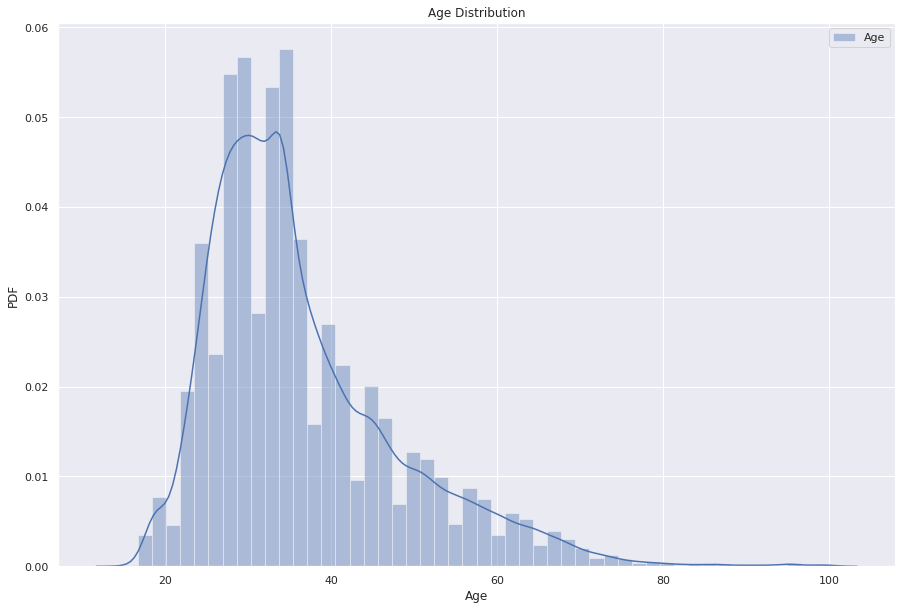

In [69]:
# Age distribution
plt.figure(figsize=(15,10))
ax = sns.distplot(data1['age'].dropna(),label="Age")
ax.set_title('Age Distribution')
ax.set(xlabel='Age', ylabel='PDF')
plt.legend()
plt.show()

In [70]:
data1_merge['age_interv'] = data1_merge['age'].apply(lambda x: age_interv(x))

data2_merge['age_interv'] = data2_merge['age'].apply(lambda x: age_interv(x))

In [71]:
# mode replacement for first_affiliate_tracked

data1_merge.first_affiliate_tracked.fillna('untracked',inplace = True)

data2_merge.first_affiliate_tracked.fillna('untracked',inplace = True)

In [72]:
#getting labels

y = data1_merge['country_destination']


In [73]:

# drop colmns

data1_merge.drop(['id','date_account_created','timestamp_first_active',\
                  'date_first_booking','country_destination','user_id'],axis=1,inplace = True)

data2_merge.drop(['id','date_account_created','timestamp_first_active',\
                  'date_first_booking','user_id'],axis=1,inplace = True)

In [74]:
# OHE

# https://stackoverflow.com/questions/41335718/keep-same-dummy-variable-in-data1ing-and-data2ing-data

lst_ohe_data1 = []

ohe = ['gender', 'signup_method', 'language', 'affiliate_channel',\
            'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']

for feat in ohe:
    
    data1_ohe = pd.get_dummies(data1_merge[feat], prefix=feat)
    
    data1_merge.drop([feat], axis=1, inplace = True)
    
    data2_ohe = pd.get_dummies(data2_merge[feat], prefix=feat)
    
    data2_merge.drop([feat], axis=1, inplace = True)
    
    lst_ohe_data1.append(data1_ohe.columns)
        
    # Get missing columns in the data1ing data2
    
    missing_cols = set( data1_ohe.columns ) - set( data2_ohe.columns )
    
    # Add a missing column in data2 set with default value equal to 0
    
    for c in missing_cols:
        
        data2_ohe[c] = 0
        
    # Ensure the order of column in the data2 set is in the same order than in data1 set
    
    data2_ohe = data2_ohe[data1_ohe.columns]
    
    data1_merge = pd.concat((data1_merge, data1_ohe), axis=1)    
        
    data2_merge = pd.concat((data2_merge, data2_ohe), axis=1)

In [75]:
# OHE device_type

# https://stackoverflow.com/questions/57469676/python-one-hot-encoding-for-comma-separated-values

data1_ohe = data1_merge['device_type'].str.get_dummies(sep=",")
    
data1_merge.drop(['device_type'], axis=1, inplace = True)
    
data2_ohe = data2_merge['device_type'].str.get_dummies(sep=",")
    
data2_merge.drop(['device_type'], axis=1, inplace = True)
        
# Get missing columns in the data1ing data2
    
missing_cols = set( data1_ohe.columns ) - set( data2_ohe.columns )

lst_ohe_data1.append(data1_ohe.columns)
    
# Add a missing column in data2 set with default value equal to 0
    
for c in missing_cols:
        
    data2_ohe[c] = 0
        
# Ensure the order of column in the data2 set is in the same order than in data1 set
    
data2_ohe = data2_ohe[data1_ohe.columns]
    
data1_merge = pd.concat((data1_merge, data1_ohe), axis=1)    
        
data2_merge = pd.concat((data2_merge, data2_ohe), axis=1)

In [76]:
print(data1_merge.columns)

data1_merge.head()

Index(['age', 'signup_flow', 'action', 'action_type', 'action_detail',
       'secs_elapsed', 'date_account_created_day',
       'date_account_created_month', 'date_account_created_year',
       'timestamp_first_active_day',
       ...
       'Chromebook', 'Linux Desktop', 'Mac Desktop', 'Opera Phone', 'Tablet',
       'Windows Desktop', 'Windows Phone', 'iPad Tablet', 'iPhone',
       'iPodtouch'],
      dtype='object', length=139)


,age,signup_flow,action,action_type,action_detail,secs_elapsed,date_account_created_day,date_account_created_month,date_account_created_year,timestamp_first_active_day,timestamp_first_active_month,timestamp_first_active_year,timestamp_first_active_hour,age_interv,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,language_ca,language_cs,language_da,language_de,language_el,language_en,language_es,language_fi,language_fr,language_hu,language_id,language_is,language_it,language_ja,language_ko,language_nl,language_no,language_pl,language_pt,...,first_browser_CoolNovo,first_browser_Firefox,first_browser_Googlebot,first_browser_IE,first_browser_IE Mobile,first_browser_IceDragon,first_browser_IceWeasel,first_browser_Iron,first_browser_Maxthon,first_browser_Mobile Firefox,first_browser_Mobile Safari,first_browser_Mozilla,first_browser_Opera,first_browser_Opera Mini,first_browser_Outlook 2007,first_browser_Pale Moon,first_browser_RockMelt,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_Sogou Explorer,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser,-unknown-,Android App Unknown Phone/Tablet,Android Phone,Blackberry,Chromebook,Linux Desktop,Mac Desktop,Opera Phone,Tablet,Windows Desktop,Windows Phone,iPad Tablet,iPhone,iPodtouch
0,62.0,0,"lookup,search_results,lookup,search_results,lo...",",click,,click,,click,,data,view,,click,,data,v...",",view_search_results,,view_search_results,,vie...",3427529.0,2,1,2014,2,1,2014,0,10,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,34.0,0,"dashboard,create,confirm_email,show,show_perso...","view,submit,click,view,data,view,data,data,","dashboard,create_user,confirm_email_link,p3,us...",207842.0,2,1,2014,2,1,2014,0,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,34.0,0,"verify,create,,pending,requested,header_userpi...","-unknown-,submit,message_post,booking_request,...","-unknown-,create_user,message_post,pending,p5,...",1135444.0,2,1,2014,2,1,2014,0,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,34.0,0,"lookup,show,search_results,search_results,show...",",view,click,click,view,view,click,data,data,da...",",p3,view_search_results,view_search_results,p3...",3755100.0,2,1,2014,2,1,2014,0,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
4,34.0,25,"campaigns,active,create,notifications,listings...","-unknown-,-unknown-,-unknown-,-unknown-,-unkno...","-unknown-,-unknown-,-unknown-,-unknown-,-unkno...",2555.0,2,1,2014,2,1,2014,0,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [77]:
#Checking null values
data1_merge.isnull().sum()

age                0
signup_flow        0
action             0
action_type        0
action_detail      0
                  ..
Windows Desktop    0
Windows Phone      0
iPad Tablet        0
iPhone             0
iPodtouch          0
Length: 139, dtype: int64

In [78]:
print(data2_merge.columns)

data2_merge.head()

Index(['age', 'signup_flow', 'action', 'action_type', 'action_detail',
       'secs_elapsed', 'date_account_created_day',
       'date_account_created_month', 'date_account_created_year',
       'timestamp_first_active_day',
       ...
       'Chromebook', 'Linux Desktop', 'Mac Desktop', 'Opera Phone', 'Tablet',
       'Windows Desktop', 'Windows Phone', 'iPad Tablet', 'iPhone',
       'iPodtouch'],
      dtype='object', length=139)


,age,signup_flow,action,action_type,action_detail,secs_elapsed,date_account_created_day,date_account_created_month,date_account_created_year,timestamp_first_active_day,timestamp_first_active_month,timestamp_first_active_year,timestamp_first_active_hour,age_interv,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,language_ca,language_cs,language_da,language_de,language_el,language_en,language_es,language_fi,language_fr,language_hu,language_id,language_is,language_it,language_ja,language_ko,language_nl,language_no,language_pl,language_pt,...,first_browser_CoolNovo,first_browser_Firefox,first_browser_Googlebot,first_browser_IE,first_browser_IE Mobile,first_browser_IceDragon,first_browser_IceWeasel,first_browser_Iron,first_browser_Maxthon,first_browser_Mobile Firefox,first_browser_Mobile Safari,first_browser_Mozilla,first_browser_Opera,first_browser_Opera Mini,first_browser_Outlook 2007,first_browser_Pale Moon,first_browser_RockMelt,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_Sogou Explorer,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser,-unknown-,Android App Unknown Phone/Tablet,Android Phone,Blackberry,Chromebook,Linux Desktop,Mac Desktop,Opera Phone,Tablet,Windows Desktop,Windows Phone,iPad Tablet,iPhone,iPodtouch
0,35.0,0,"show,search,search,show,authenticate,reviews,a...","view,click,click,view,submit,data,-unknown-,click","user_profile,view_search_results,view_search_r...",119187.0,1,7,2014,1,7,2014,0,5,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,34.0,0,"dashboard,login,search,create,search,signup_lo...","view,view,click,submit,click,view,-unknown-,vi...","dashboard,login_page,view_search_results,creat...",250119.0,1,7,2014,1,7,2014,0,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,34.0,0,"index,index,index,search_results,search_result...","view,view,view,click,click,click,click,data,vi...","view_search_results,view_search_results,view_s...",975575.0,1,7,2014,1,7,2014,0,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,34.0,0,"personalize,header_userpic,header_userpic,show...","data,data,data,view,view,,data,click,submit,,data","wishlist_content_update,header_userpic,header_...",123001.0,1,7,2014,1,7,2014,0,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,34.0,0,"message_to_host_change,agree_terms_check,pendi...","click,-unknown-,booking_request,message_post,v...","message_to_host_change,-unknown-,pending,messa...",454023.0,1,7,2014,1,7,2014,0,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [79]:

#Checking null values
data2_merge.isnull().sum()

age                0
signup_flow        0
action             0
action_type        0
action_detail      0
                  ..
Windows Desktop    0
Windows Phone      0
iPad Tablet        0
iPhone             0
iPodtouch          0
Length: 139, dtype: int64

In [80]:
print(data1_merge.shape,y.shape)

(73815, 139) (73815,)


In [81]:
print(data2_merge.shape)

(62096, 139)


In [82]:
# tokenisation

def tokens(x):
        
    """
    
    Function takes strings and tokenises using comma.
    
    parameters:  string
    
    returns: comma separeted tokens
    
    """
        
    return x.split(',')

In [83]:

# TFIDF action


vectorizer_action = TfidfVectorizer(min_df=10,max_features=5000,tokenizer=tokens)

vectorizer_action.fit(data1_merge['action'].values)

data1_merge_action_tfidf = vectorizer_action.transform(data1_merge['action'].values)

data2_merge_action_tfidf = vectorizer_action.transform(data2_merge['action'].values)

print("After vectorizations")
print(data1_merge_action_tfidf.shape)
print(data2_merge_action_tfidf.shape)
print("="*100)

After vectorizations
(73815, 256)
(62096, 256)


In [84]:
action_feat = vectorizer_action.get_feature_names()

action_feat

['',
 '10',
 '11',
 '12',
 '15',
 'about_us',
 'account',
 'active',
 'add_guests',
 'add_note',
 'agree_terms_check',
 'agree_terms_uncheck',
 'airbnb_picks',
 'ajax_check_dates',
 'ajax_get_referrals_amt',
 'ajax_get_results',
 'ajax_google_translate',
 'ajax_google_translate_description',
 'ajax_google_translate_reviews',
 'ajax_image_upload',
 'ajax_ldp',
 'ajax_lwlb_contact',
 'ajax_payout_edit',
 'ajax_payout_options_by_country',
 'ajax_photo_widget_form_iframe',
 'ajax_price_and_availability',
 'ajax_referral_banner_experiment_type',
 'ajax_referral_banner_type',
 'ajax_refresh_subtotal',
 'ajax_send_message',
 'ajax_statsd',
 'ajax_worth',
 'apply_code',
 'apply_coupon_click',
 'apply_coupon_click_success',
 'apply_coupon_error',
 'apply_coupon_error_type',
 'apply_reservation',
 'ask_question',
 'at_checkpoint',
 'authenticate',
 'authorize',
 'available',
 'become_user',
 'calendar_tab_inner2',
 'callback',
 'campaigns',
 'cancel',
 'cancellation_policies',
 'cancellation_pol

In [85]:
# TFIDF action_type

vectorizer_action_type = TfidfVectorizer(min_df=10,max_features=5000,tokenizer=tokens)

vectorizer_action_type.fit(data1_merge['action_type'].values)

data1_merge_action_type_tfidf = vectorizer_action_type.transform(data1_merge['action_type'].values)

data2_merge_action_type_tfidf = vectorizer_action_type.transform(data2_merge['action_type'].values)

print("After vectorizations")
print(data1_merge_action_type_tfidf.shape)
print(data2_merge_action_type_tfidf.shape)
print("="*100)

After vectorizations
(73815, 9)
(62096, 9)


In [86]:
action_type_feat = vectorizer_action_type.get_feature_names()

action_type_feat

['',
 '-unknown-',
 'booking_request',
 'click',
 'data',
 'message_post',
 'partner_callback',
 'submit',
 'view']

In [87]:
# TFIDF action_detail

vectorizer_action_detail = TfidfVectorizer(min_df=10,max_features=5000,tokenizer=tokens)

vectorizer_action_detail.fit(data1_merge['action_detail'].values)

data1_merge_action_detail_tfidf = vectorizer_action_detail.transform(data1_merge['action_detail'].values)

data2_merge_action_detail_tfidf = vectorizer_action_detail.transform(data2_merge['action_detail'].values)

print("After vectorizations")
print(data1_merge_action_detail_tfidf.shape)
print(data2_merge_action_detail_tfidf.shape)
print("="*100)

After vectorizations
(73815, 122)
(62096, 122)


In [88]:

action_detail_feat = vectorizer_action_detail.get_feature_names()

action_detail_feat

['',
 '-unknown-',
 'account_notification_settings',
 'account_payout_preferences',
 'account_privacy_settings',
 'account_transaction_history',
 'admin_templates',
 'airbnb_picks_wishlists',
 'alteration_field',
 'alteration_request',
 'apply_coupon',
 'apply_coupon_click',
 'apply_coupon_click_success',
 'apply_coupon_error',
 'at_checkpoint',
 'book_it',
 'calculate_worth',
 'cancellation_policies',
 'cancellation_policy_click',
 'change_availability',
 'change_contact_host_dates',
 'change_or_alter',
 'change_password',
 'change_trip_characteristics',
 'complete_booking',
 'confirm_email',
 'confirm_email_link',
 'contact_host',
 'coupon_code_click',
 'coupon_field_focus',
 'create_alteration_request',
 'create_listing',
 'create_phone_numbers',
 'create_user',
 'dashboard',
 'delete_listing',
 'delete_phone_numbers',
 'edit_profile',
 'email_wishlist',
 'email_wishlist_button',
 'forgot_password',
 'friends_wishlists',
 'guest_cancellation',
 'guest_itinerary',
 'guest_receipt',
 

In [89]:
# drop colmns

data1_merge.drop(['action','action_type','action_detail'],axis=1,inplace = True)

data2_merge.drop(['action','action_type','action_detail'],axis=1,inplace = True)

In [90]:
col_lst = [i for i in data1_merge.columns]

col_lst

['age',
 'signup_flow',
 'secs_elapsed',
 'date_account_created_day',
 'date_account_created_month',
 'date_account_created_year',
 'timestamp_first_active_day',
 'timestamp_first_active_month',
 'timestamp_first_active_year',
 'timestamp_first_active_hour',
 'age_interv',
 'gender_-unknown-',
 'gender_FEMALE',
 'gender_MALE',
 'gender_OTHER',
 'signup_method_basic',
 'signup_method_facebook',
 'signup_method_google',
 'language_ca',
 'language_cs',
 'language_da',
 'language_de',
 'language_el',
 'language_en',
 'language_es',
 'language_fi',
 'language_fr',
 'language_hu',
 'language_id',
 'language_is',
 'language_it',
 'language_ja',
 'language_ko',
 'language_nl',
 'language_no',
 'language_pl',
 'language_pt',
 'language_ru',
 'language_sv',
 'language_th',
 'language_tr',
 'language_zh',
 'affiliate_channel_api',
 'affiliate_channel_content',
 'affiliate_channel_direct',
 'affiliate_channel_other',
 'affiliate_channel_remarketing',
 'affiliate_channel_sem-brand',
 'affiliate_cha

In [91]:
# data stacking

data1_merge_tfidf = hstack((data1_merge,data1_merge_action_tfidf,data1_merge_action_type_tfidf,data1_merge_action_detail_tfidf)).tocsr()

data2_merge_tfidf = hstack((data2_merge,data2_merge_action_tfidf,data2_merge_action_type_tfidf,data2_merge_action_detail_tfidf)).tocsr()

print("Final Data matrix")
print(data1_merge_tfidf.shape)
print(data2_merge_tfidf.shape)
print("="*100)

Final Data matrix
(73815, 523)
(62096, 523)


In [92]:
col_lst.extend(action_feat)

col_lst.extend(action_type_feat)

col_lst.extend(action_detail_feat)


len(col_lst)

523

In [93]:
def save_sparse_csr(filename, array):
    
    """
    
    Function takes csr matrix and stores it in single file.
    
    parameters:  filename, csr matrix
        
    """
    
    np.savez(filename, data=array.data, indices=array.indices,
             indptr=array.indptr, shape=array.shape)

def load_sparse_csr(filename):
    
    """
    
    Function takes filename and returns csr matrix .
    
    parameters:  filename
    
    returns: csr matrix
    
    """
    
    loader = np.load(filename)
    return csr_matrix((loader['data'], loader['indices'], loader['indptr']),
                      shape=loader['shape'])

In [94]:


# saving to memory

save_sparse_csr('/content/data1_merge_tfidf',data1_merge_tfidf)

save_sparse_csr('/content/data2_merge_tfidf',data2_merge_tfidf)

np.save('/content/y',y)

with open("/content/col_lst.txt", "wb") as fp:
    
    pickle.dump(col_lst, fp)
    
fp.close()

with open("/content/lst_ohe_data1.txt", "wb") as fp:
    
    pickle.dump(lst_ohe_data1, fp)
    
fp.close()

pickle.dump(vectorizer_action, open("/content/vectorizer_action.pickle", "wb"))

pickle.dump(vectorizer_action_type, open("/content/vectorizer_action_type.pickle", "wb"))

pickle.dump(vectorizer_action_detail, open("/content/vectorizer_action_detail.pickle", "wb"))

session_df_concat.to_pickle('/content/session_df_concat.pickle')

In [95]:
# loading from memory

data1_merge_tfidf = load_sparse_csr('/content/data1_merge_tfidf.npz')

data2_merge_tfidf = load_sparse_csr('/content/data2_merge_tfidf.npz')

y = np.load('/content/y.npy',allow_pickle=True)

with open("/content/col_lst.txt", "rb") as fp:
    
    col_lst = pickle.load(fp)
    
fp.close()

with open("/content/lst_ohe_data1.txt", "rb") as fp:
    
    lst_ohe_data1 = pickle.load(fp)
    
fp.close()

vectorizer_action = pickle.load(open("/content/vectorizer_action.pickle", "rb"))

vectorizer_action_type = pickle.load(open("/content/vectorizer_action_type.pickle", "rb"))

vectorizer_action_detail = pickle.load(open("/content/vectorizer_action_detail.pickle", "rb"))

session_df_concat = pd.read_pickle('/content/session_df_concat.pickle')

data1_merge_raw = pd.read_pickle('/content/data1_merge_raw.pickle')

In [96]:
print("Final Data matrix")
print(data1_merge_tfidf.shape)
print(data2_merge_tfidf.shape)
print(y.shape)
print(len(vectorizer_action.get_feature_names()))
print(len(vectorizer_action_type.get_feature_names()))
print(len(vectorizer_action_detail.get_feature_names()))
print(session_df_concat.shape)
print(data1_merge_raw.shape)
print(len(col_lst))
print(len(lst_ohe_data1))
print("="*100)

Final Data matrix
(73815, 523)
(62096, 523)
(73815,)
256
9
122
(135483, 6)
(73815, 22)
523
10


Modeling

In [97]:
import pandas as pd
import numpy as np
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re
from wordcloud import WordCloud
from tqdm import tqdm
from datetime import datetime, date
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import coo_matrix
from scipy.sparse import hstack
from scipy.sparse import vstack
from scipy import sparse
from scipy.sparse import csr_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
from scipy.stats import randint as sp_randint
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pickle
import joblib
from IPython.display import Image

In [98]:

def load_sparse_csr(filename):
    
    """
    
    Function takes filename and returns csr matrix .
    
    parameters:  filename
    
    returns: csr matrix
    
    """
    
    loader = np.load(filename)
    return csr_matrix((loader['data'], loader['indices'], loader['indptr']),
                      shape=loader['shape'])

In [99]:

data1_merge_tfidf = load_sparse_csr('/content/data1_merge_tfidf.npz')

data2_merge_tfidf = load_sparse_csr('/content/data2_merge_tfidf.npz')

y = np.load('/content/y.npy', allow_pickle=True)

with open("/content/col_lst.txt", "rb") as fp:
    
    col_lst = pickle.load(fp)
    
fp.close()

In [100]:
print("Final Data matrix")
print(data1_merge_tfidf.shape)
print(data2_merge_tfidf.shape)
print(y.shape)
print(len(col_lst))
print("="*100)

Final Data matrix
(73815, 523)
(62096, 523)
(73815,)
523


In [101]:

le = LabelEncoder()

y = le.fit_transform(y)

y

array([11,  7,  7, ...,  7,  7,  7])

In [102]:


def dcg_score(y_true, y_score, k=5):
    
    """Discounted cumulative gain (DCG) at rank K.

    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (true relevance labels).
    y_score : array, shape = [n_samples, n_classes]
        Predicted scores.
    k : int
        Rank.

    Returns
    -------
    score : float
    """
    
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)


def ndcg_score(ground_truth, predictions, k=5):
    
    """Normalized discounted cumulative gain (NDCG) at rank K.

    Normalized Discounted Cumulative Gain (NDCG) measures the performance of a
    recommendation system based on the graded relevance of the recommended
    entities. It varies from 0.0 to 1.0, with 1.0 representing the ideal
    ranking of the entities.

    Parameters
    ----------
    ground_truth : array, shape = [n_samples]
        Ground truth (true labels represended as integers).
    predictions : array, shape = [n_samples, n_classes]
        Predicted probabilities.
    k : int
        Rank.

    Returns
    -------
    score : float

    Example
    -------
    >>> ground_truth = [1, 0, 2]
    >>> predictions = [[0.15, 0.55, 0.2], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    1.0
    >>> predictions = [[0.9, 0.5, 0.8], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    0.6666666666
    """
    
    lb = LabelBinarizer()
    lb.fit(range(predictions.shape[1] + 1))
    T = lb.transform(ground_truth)

    scores = []

    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)

    return np.mean(scores)


# NDCG Scorer function
ndcg_scorer = make_scorer(ndcg_score, needs_proba=True, k=5)

Testing with Logistic Regression

In [103]:
params =  {'C':[0.0001, 0.001, 0.01]}

lr = linear_model.LogisticRegression(multi_class="multinomial",solver="lbfgs")

clf = RandomizedSearchCV(lr, params, verbose=10, n_iter=3 ,n_jobs=-1,scoring=ndcg_scorer)

In [ ]:
clf.fit(data1_merge_tfidf,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   59.7s


In [ ]:
pred_y = clf.predict_proba(data1_merge_tfidf)

In [ ]:
clf.best_params_

In [ ]:
#data1 ndcg score

s = ndcg_score(y, pred_y, k=5)

s

testing with Random Forest

In [1]:

params = {
'n_estimators' : [200, 700, 800, 1000, 1200],
'max_depth' : [15, 20, 25, 30, 35, 50],
'min_samples_split' : [2, 3, 5, 8],
'min_samples_leaf' : [1, 2, 5, 10] }

rf = RandomForestClassifier()

clf = RandomizedSearchCV(rf, params, verbose=10,n_jobs=-1,scoring=ndcg_scorer)

NameError: ignored

In [2]:
clf.fit(data1_merge_tfidf,y)

NameError: ignored

In [ ]:
pred_y = clf.predict_proba(data1_merge_tfidf)

In [ ]:
clf.best_params_

In [ ]:
#data1 ndcg score

s = ndcg_score(y, pred_y, k=5)

s

testing with Xgboost

In [ ]:
param_grid = {
'max_depth': sp_randint(3, 20),
'learning_rate': [0.001, 0.01, 0.1, 0.2],
'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
'min_child_weight': [0.25,0.5, 1.0, 3.0, 5.0, 7.0],
'gamma': [0, 0.25, 0.3,0.35,0.45,0.5,0.6,0.8,1.0],
'reg_lambda': [0.1,0.2,0.4,0.5,0.6,0.8,1.0,10.0],
'n_estimators':[100,200,500,1000,2000],
'colsample_bytree':[0.1,0.3,0.5,1],
'colsample_bylevel':[0.1,0.3,0.5,1]
}


gb = xgb.XGBClassifier(objective='multi:softmax',eval_metric= 'mlogloss')

clf = RandomizedSearchCV(gb, param_grid,n_jobs=-1,verbose=10,scoring=ndcg_scorer, random_state=42)

In [ ]:
clf.fit(data1_merge_tfidf,y)

In [ ]:
pred_y = clf.predict_proba(data1_merge_tfidf)

In [ ]:
# data1 ndcg score

s = ndcg_score(y, pred_y, k=5)

s

In [ ]:
#feature importance

features = col_lst
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()